## Using a particular scikit learn version

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [3]:
X,y = data, target

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [19]:
mod = KNeighborsRegressor().fit(X,y)

pipe = Pipeline([
    ('scale', StandardScaler()),
    ('model', KNeighborsRegressor(n_neighbors=1))
])
# pipe.get_params()

## We use grid search cv to split our data into train and predict set automatically, making our model learn and giving us the best outcome

In [22]:
# cv means cross valudation, the values the estimator take are in pipe already
mod = GridSearchCV(estimator=pipe,
                   param_grid={'model__n_neighbors':[1,2,3,4,5,6,7,8,9,10]},
                   cv=3)

In [24]:
mod.fit(X,y)
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005009,1.418966e-03,0.004530,3.993720e-03,1,{'model__n_neighbors': 1},0.226933,0.432998,0.127635,0.262522,0.127179,10
1,0.001667,4.696306e-04,0.002333,4.726070e-04,2,{'model__n_neighbors': 2},0.358216,0.409229,0.172294,0.313246,0.101821,9
2,0.001329,4.727826e-04,0.002332,4.714266e-04,3,{'model__n_neighbors': 3},0.413515,0.476651,0.318534,0.402900,0.064986,1
3,0.001333,4.712580e-04,0.001666,4.710896e-04,4,{'model__n_neighbors': 4},0.475349,0.402495,0.273014,0.383619,0.083675,7
4,0.001334,4.713705e-04,0.001666,4.713142e-04,5,{'model__n_neighbors': 5},0.512318,0.347951,0.262590,0.374286,0.103638,8
5,0.001000,1.123916e-07,0.001999,8.485379e-07,6,{'model__n_neighbors': 6},0.533611,0.389504,0.248482,0.390532,0.116406,6
6,0.001002,1.030086e-06,0.002019,2.764902e-05,7,{'model__n_neighbors': 7},0.544782,0.385199,0.243668,0.391216,0.123003,5
7,0.000000,0.000000e+00,0.000000,0.000000e+00,8,{'model__n_neighbors': 8},0.589644,0.394650,0.209714,0.398003,0.155124,2
8,0.000333,4.706960e-04,0.005932,7.020880e-03,9,{'model__n_neighbors': 9},0.590352,0.407556,0.185253,0.394387,0.165643,3
9,0.000666,4.710333e-04,0.001000,8.166321e-04,10,{'model__n_neighbors': 10},0.616510,0.395077,0.164023,0.391870,0.184741,4


In [12]:
pred = pipe.predict(X)

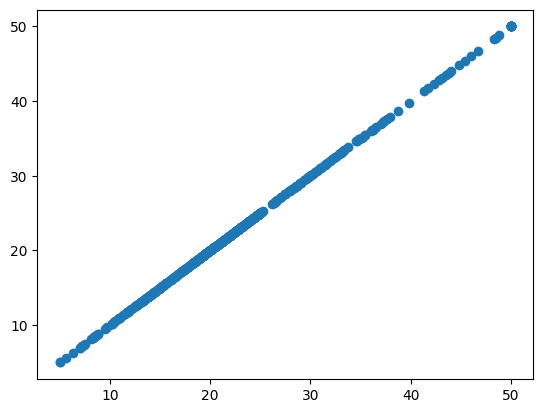

In [13]:
plt.scatter(pred, y)
plt.show()